# Table of Contents
 <p><div class="lev1 toc-item"><a href="#OSMI-Health-Survey-2016:-Exploratory-Data-Analysis" data-toc-modified-id="OSMI-Health-Survey-2016:-Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>OSMI Health Survey 2016: Exploratory Data Analysis</a></div><div class="lev1 toc-item"><a href="#Metadata-Analysis" data-toc-modified-id="Metadata-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Metadata Analysis</a></div><div class="lev1 toc-item"><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Analysis</a></div><div class="lev2 toc-item"><a href="#Univariate-Statistics" data-toc-modified-id="Univariate-Statistics-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Univariate Statistics</a></div><div class="lev3 toc-item"><a href="#Variables-related-to-Mental-Health" data-toc-modified-id="Variables-related-to-Mental-Health-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Variables related to Mental Health</a></div><div class="lev3 toc-item"><a href="#Demographic-Variables" data-toc-modified-id="Demographic-Variables-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Demographic Variables</a></div><div class="lev3 toc-item"><a href="#Company-Information" data-toc-modified-id="Company-Information-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Company Information</a></div><div class="lev2 toc-item"><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Bivariate Analysis</a></div><div class="lev3 toc-item"><a href="#Crosstabs-For-Diagnoses" data-toc-modified-id="Crosstabs-For-Diagnoses-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Crosstabs For Diagnoses</a></div><div class="lev3 toc-item"><a href="#Demographic-relationships-with-Diagnosis" data-toc-modified-id="Demographic-relationships-with-Diagnosis-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Demographic relationships with Diagnosis</a></div><div class="lev3 toc-item"><a href="#Company-Relationships-with-Diagnosis" data-toc-modified-id="Company-Relationships-with-Diagnosis-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Company Relationships with Diagnosis</a></div><div class="lev1 toc-item"><a href="#Discussion" data-toc-modified-id="Discussion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Discussion</a></div>

# OSMI Health Survey 2016: Exploratory Data Analysis

_By [Michael Rosenberg](mailto:mmrosenb@andrew.cmu.edu)._

_**Description**: Contains my exploratory data analysis related to the [OSMI Mental Health In Tech Survey 2016](https://osmihelp.org/research/). This notebook is written in `Python 2`._

In [5]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re #for string manipulation
from IPython.display import display
import warnings

#constants and functions
%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_style("dark")
figWidth = figHeight = 5 #for figure dimensions
sigLev = 3 #for significant digits

# Metadata Analysis

For initially studying the dataset, I placed some of my metadata notes [here](metaDataAnalysis.txt). That being said, I am still left with a couple of questions about the dataset:

* How was the survey distributed? Was this across particular companies? Is this a sample of voluntary submissions? These questions may inform the types of responses that we see.

* Are all levels possible for list questions submitted in the survey? We may have some options from the list questions that were not submitted in any of the responses. These options that were not submitted may still be relevant to our analysis.

* I see that there is a [version of the survey from 2014](https://osmihelp.org/research/). Would it be useful to study some of the intertemporal effects of the last two years between these surveys?

* Is there an option to not complete the survey?

These are some of my personal questions. For now, it'll be important to explore some of the questions suggested in the [Hypothesis Discussion](https://data.world/kittybot/osmi-mental-health-tech-2016/discuss/hypotheses-questions/7676).

In [6]:
responseFrame = pd.read_csv("../data/raw/osmi-survey-2016_data.csv")

<a id="expAnalysis" />

# Exploratory Analysis

We should start answering our question by doing some simple explorations of relevant variables.

In [7]:
numQuestions = responseFrame.shape[1]
numResponses = responseFrame.shape[0]

We see that the survey contains {{numQuestions}} questions and {{numResponses}} responses. Thankfully, the labeling scheme on the columns seems to be rather clear, so we will likely not need to refer to the ```.json``` file too often.

In [8]:
responseFrame["responseID"] = range(responseFrame.shape[0])

## Univariate Statistics

We will build some univariate plots on some variables deemed relevant to the analysis in the [Hypothesis Discussion](https://data.world/kittybot/osmi-mental-health-tech-2016/discuss/hypotheses-questions/7676).

In [9]:
def buildBarplot(varName,responseFrame,useDensity = True):
    #helper to build our barplots
    countFrame = responseFrame.groupby(varName,as_index = False)[
                                                        "responseID"].count()
    #rename some features
    countFrame = countFrame.rename(columns = {"responseID":"count"})
    #then plot
    if (useDensity):
        #plot density
        countFrame["density"] = countFrame["count"]/np.sum(countFrame["count"]) 
        sns.barplot(x = varName,y = "density",data = countFrame)
        plt.ylabel("density")
    else: #plot count
        sns.barplot(x = varName,y = "count",data = countFrame)
        plt.ylabel("count")
    plt.title("Distribution of\n" + varName)

### Variables related to Mental Health

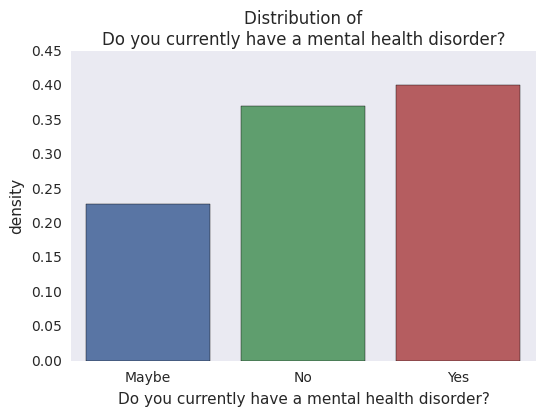

In [10]:
buildBarplot("Do you currently have a mental health disorder?",responseFrame)

_Figure 1: Distribution of the question "Do You currently have a mental health disorder?"._

We see that close to $40\%$ of the responses are from individuals who currently have a mental health disorder. To me, this is shockingly high, because it suggests a rate of mental health disorders that I have not seen before. That being said, depending on how the data was collected, this may be a self-selected sample, i.e. individuals who deal with mental health disorders are more likely to answer this survey than individuals who don't. Given this, it is extremely important that we consider the methodology used to collect this sample.

Of those who have said yes, let us see what is the average number of conditions diagnosed.

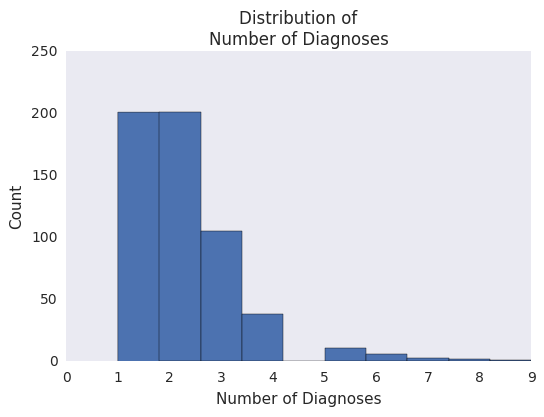

In [11]:
diagnoseQString = "If yes, what condition(s) have you been diagnosed with?"
diagnosedFrame = responseFrame[responseFrame[diagnoseQString].notnull()]
#count num diagnoses
def getNumDiagnoses(diagString):
    #helper for getting the number of diagnoses
    listOfOrOccurences = re.findall("\|",diagString)
    #because these don't occur in single answers, return length plus one
    return len(listOfOrOccurences) + 1
diagnosedFrame["numDiagnoses"] = diagnosedFrame[diagnoseQString].apply(
                                                getNumDiagnoses)
#then make histogram
plt.hist(list(diagnosedFrame["numDiagnoses"]))
plt.xlabel("Number of Diagnoses")
plt.ylabel("Count")
plt.title("Distribution of\nNumber of Diagnoses")

_Figure 2: Distribution of the number of diagnoses among individuals who have been diagnosed with a mental health disorder._

We see a typical right-skew, which suggests that most people have only one or two diagnoses if they have been diagnosed, and only a few responses with a large number of diagnoses.

Let's see what types of diagnoses are occuring in this portion of the dataset.

In [12]:
#get all the levels available
diagnosisLevels = set()
for diagString in diagnosedFrame[diagnoseQString]:
    #split by the or operation and add them to this set
    diagnoses = diagString.split("|")
    for diagnosis in diagnoses:
        diagnosisLevels.add(diagnosis)
for diagnosis in diagnosisLevels:
    print diagnosis

Anxiety Disorder (Generalized, Social, Phobia, etc)
Gender Dysphoria
Dissociative Disorder
Attention Deficit Hyperactivity Disorder
Autism Spectrum Disorder
Personality Disorder (Borderline, Antisocial, Paranoid, etc)
Autism spectrum disorder
Transgender
Seasonal Affective Disorder
Substance Use Disorder
Mood Disorder (Depression, Bipolar Disorder, etc)
Traumatic Brain Injury
Schizotypal Personality Disorder
I haven't been formally diagnosed, so I felt uncomfortable answering, but Social Anxiety and Depression.
Psychotic Disorder (Schizophrenia, Schizoaffective, etc)
Eating Disorder (Anorexia, Bulimia, etc)
Addictive Disorder
Asperges
Intimate Disorder
Sexual addiction
Combination of physical impairment (strongly near-sighted) with a possibly mental one (MCD / "ADHD", though its actually a stimulus filtering impairment)
Pervasive Developmental Disorder (Not Otherwise Specified)
PDD-NOS
Obsessive-Compulsive Disorder
Burn out
Sleeping Disorder
Post-traumatic Stress Disorder
Autism (Asper

_Figure 3: Types of diagnoses that occur in the dataset._

We see that we have many levels to the diagnoses available, which suggests that it is user-inputted to some degree. In this extent, it may be useful to do a more simplified grouping if we wanted to use this as a target variable for modeling.

Interestingly, this dataset asks if you were diagnosed by a medical professional for a mental health disorder. It would be extremely interesting to study how this lines up with the previous section.

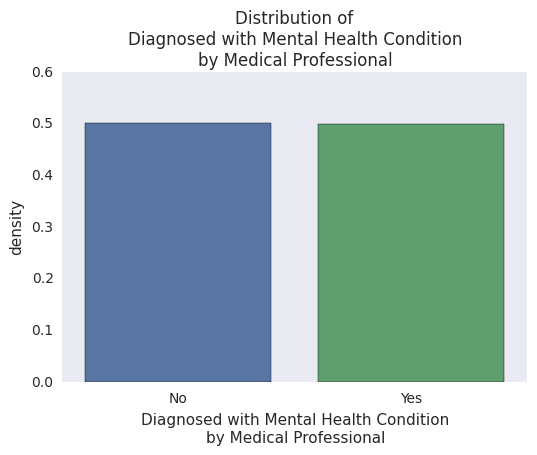

In [19]:
beenDiagVarString = "Diagnosed with Mental Health Condition\n" \
                        "by Medical Professional"
buildBarplot("Have you been diagnosed with a mental health condition by a medical professional?",
             responseFrame)
plt.xlabel(beenDiagVarString)
plt.title("Distribution of\n" + beenDiagVarString)
plt.savefig("../reports/blogPost/blogPostFigures/figure3.png",
            bbox_inches = "tight")

_Figure 4: Distribution of whether an individual has been diagnosed with a mental health condition by a medical professional._

This is close to a 50-50 split, which brings us back to the potential epidemic around mental health that has been explored by public health professionals over recent years. What is important to note is that this does not match up entirely with our previous plot. On one end, this may suggest that there are a large number of individuals who previously had a mental health condition who no longer have this condition. On the other end, this could suggest that there could be individuals who have been diagnosed but are unsure about having a condition or do not believe they have the condition despite the diagnosis. Both of these are good questions to crosstab in the [bivariate analysis](#bivariateAnalysis).

### Demographic Variables

It may be useful to also spend some time looking at the demographic variables that we may been relevant. Let us first start by studying age and gender.

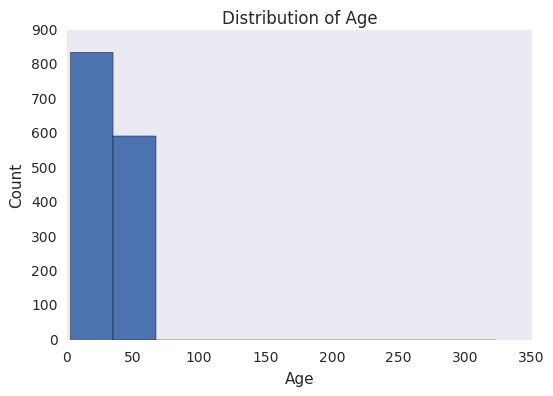

In [75]:
plt.hist(responseFrame["What is your age?"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")

_Figure 5: Distribution of ages for our responses._

It is apparent that there are some data errors from the user-inputted nature of the dataset. Let us see which rows have these abnormal ages.

In [20]:
ageCutoff = 100
outlierFrame = responseFrame[responseFrame["What is your age?"] > ageCutoff]
print outlierFrame["What is your age?"]

564    323
Name: What is your age?, dtype: int64


We see that we have one individual who has a listed age of $323$. This is probably not correct. Let us remove this user from consideration and replot our age distribution.

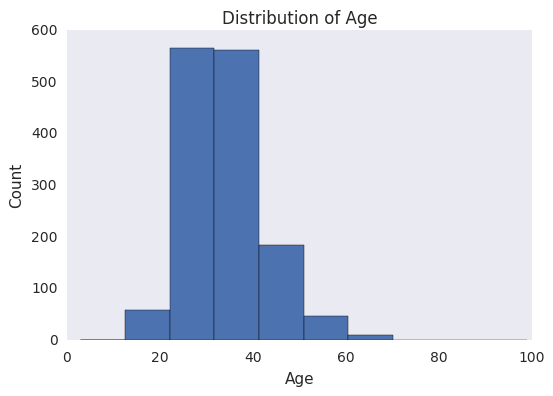

In [22]:
responseFrame = responseFrame[responseFrame["What is your age?"] <= ageCutoff]
plt.hist(responseFrame["What is your age?"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
avgAge = np.round(responseFrame["What is your age?"].mean())
plt.savefig("../reports/blogPost/blogPostFigures/figure4.png")

_Figure 6: Distirbution of age of responders._

We see that the average age of our responders is around {{avgAge}}, which is a bit higher than I would have expected for an industry that generally seems quite young. This might suggest that the way the survey is distributed may bias the expected age range of responders to be older than expected. We also see that there is a slight right-skew to the distribution, which is to be slightly expected because the tech industry generally favors younger individuals.

In [92]:
genderLevels = responseFrame["What is your gender?"].unique()
numObservedGenderLevels = genderLevels.shape[0]

We observe {{numObservedGenderLevels}} different types of gender responses in this survey. While it is essential to represent a spectrum of genders in order to properly represent individuals who are of non-binary gender, this will likely turn into a data encoding question in the future.

Let us see if there is any meaningful differences between the distribution of live-in and work-in countries.

In [100]:
#make a measuremen
diffCountriesFrame = responseFrame[
            responseFrame["What country do you live in?"] !=
            responseFrame["What country do you work in?"]]
numDiffCountries = diffCountriesFrame.shape[0]

We see that there is only about {{numDiffCountries}} responses where these two features are encoded differently. Thus, it probably only makes sense to consider one or the other. Since we are focused on the industry component of our questions, we will only consider the question "What country do you work in?".

In [103]:
#get levels
countryLevels = responseFrame["What country do you work in?"].unique()

We see that there are {{countryLevels.shape[0]}} different countries represented in this dataset. Let us see what this distribution looks like from a rank-wise perspective.

In [109]:
countryCountFrame = responseFrame.groupby("What country do you work in?",
                                        as_index = False)["responseID"].count()
#rename and order
countryCountFrame = countryCountFrame.rename(columns = {"responseID":"count"})
countryCountFrame = countryCountFrame.sort_values("count",ascending = False)
#make density and rank
countryCountFrame["density"] = (countryCountFrame["count"] /
                                np.sum(countryCountFrame["count"]))
countryCountFrame["rank"] = range(countryCountFrame.shape[0])
countryCountFrame["logRank"] = np.log(countryCountFrame["rank"] + 1)

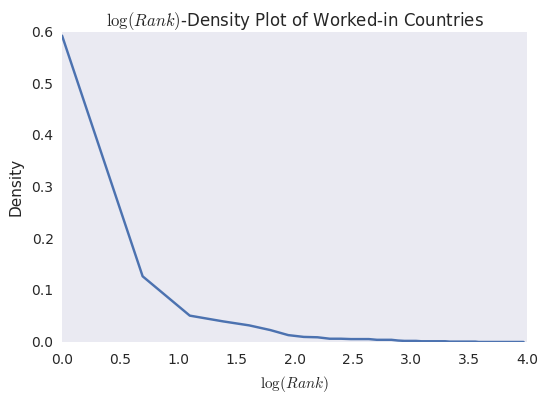

In [111]:
#then plot
plt.plot(countryCountFrame["logRank"],countryCountFrame["density"])
plt.xlabel("$\log(Rank)$")
plt.ylabel("Density")
plt.title("$\log(Rank)$-Density Plot of Worked-in Countries")

_Figure 7: $\log(Rank)$-Density distribution of our "What country do you work in?" response._

It is apparent that the distribution is primarily taken up by the top $e^2 \approx 8$ most frequent countries listed. This suggests that this is a very lopsided variable, and it might mean that we should encode this variable to potentially not be so many levels. Let's take a look at these top $8$ most frequent countries listed as work sites.

In [116]:
topLev = 8
topEightCountFrame = countryCountFrame.iloc[0:topLev,:].loc[:,
                                    ["What country do you work in?","count"]]
display(topEightCountFrame)

,What country do you work in?,count
50,United States of America,850
49,United Kingdom,183
10,Canada,74
21,Germany,58
33,Netherlands,47
2,Australia,34
45,Sweden,20
27,Ireland,15


_Table 1: The top eight countries worked in by counts._

We can see that the top eight countries that occur in our dataset exist primarily in the developed world. This may suggest that our sample will discuss a particular side of the tech industry that primarily exists in the developed world. This means that perspectives from certain tech industries in emerging markets (such as India) are generally left out. Given that India has a tech industry known for an extreme stress culture, it is very possible that we are missing part of the picture with this survey.

Of the US states, let us see which ones occur the most.

In [117]:
stateCountFrame = responseFrame.groupby(
                                "What US state or territory do you work in?",
                                as_index = False)["responseID"].count()
#rename and order
stateCountFrame = stateCountFrame.rename(columns = {"responseID":"count"})
stateCountFrame = stateCountFrame.sort_values("count",ascending = False)
#make density and rank
stateCountFrame["density"] = (stateCountFrame["count"] /
                                np.sum(stateCountFrame["count"]))
stateCountFrame["rank"] = range(stateCountFrame.shape[0])
stateCountFrame["logRank"] = np.log(stateCountFrame["rank"] + 1)

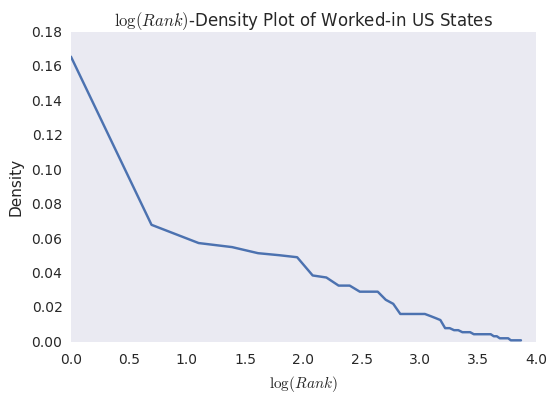

In [118]:
plt.plot(stateCountFrame["logRank"],stateCountFrame["density"])
plt.xlabel("$\log(Rank)$")
plt.ylabel("Density")
plt.title("$\log(Rank)$-Density Plot of Worked-in US States")

_Figure 8: $\log(Rank)$-Density plot of worked-in US States._

Unfortunately, this distribution looks to be a bit less sparse than I had originally imagined. Nonetheless, it will be useful to get a sense of particular states that may be somewhat relevant features. This is particular important to identify due to the fact that east-coast and west-coast technology cultures are generally identifies as seeming rather different.

In [121]:
topLev = 10
topTenStateFrame = stateCountFrame.loc[:,
        ["What US state or territory do you work in?","count"]].iloc[0:topLev]
display(topTenStateFrame)

,What US state or territory do you work in?,count
3,California,141
12,Illinois,58
30,New York,49
21,Michigan,47
41,Texas,44
22,Minnesota,43
45,Washington,42
35,Oregon,33
36,Pennsylvania,32
40,Tennessee,28


_Table 2: Distribution of the US states represented in the responses._

As we can expect, California is highly represented. Interestingly, Illinois occurs about as often as New York in this dataset. This may suggest that there is some balancing act between where technology industries are located versus where large populations of Americans live. That being said, we can see some groups forming here: a west-coast group (California, Washington, Oregon), and a set of technological agglomerations that occur in financial centers (Illinois, New York).

Let's also study the types of work these individuals are within in the tech industry.

In [26]:
#check the levels of this
#get all the levels available
workLevels = set()
for workString in responseFrame[
    "Which of the following best describes your work position?"]:
    #split by the or operation and add them to this set
    works = workString.split("|")
    for work in works:
        workLevels.add(work)
for work in workLevels:
    print work

Front-end Developer
Designer
Back-end Developer
HR
Support
Sales
Dev Evangelist/Advocate
Other
DevOps/SysAdmin
Executive Leadership
Supervisor/Team Lead
One-person shop


_Figure 9: Work levels described._

We see that there is a limited number of levels observed of this variable. Let us explore what's the typical number of positions a given individual lists for this section.

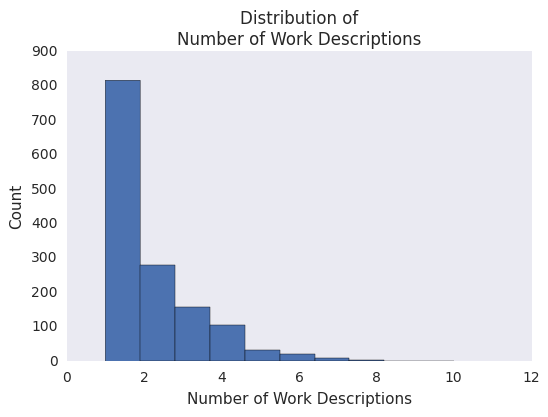

In [27]:
#it's essentially the same splitting function
getNumWorks = getNumDiagnoses
#run the process
responseFrame["numWorkLevs"] = list(responseFrame[
"Which of the following best describes your work position?"].apply(getNumWorks))
#then make a histogram
plt.hist(responseFrame["numWorkLevs"])
plt.title("Distribution of\nNumber of Work Descriptions")
plt.xlabel("Number of Work Descriptions")
plt.ylabel("Count")

_Figure 10: Distribution of the number of work descriptions in each response._

We see that most responses have only one work description attached. That being said, we see a long tail of work descriptions attached to individuals, which may suggest some level of stress on individuals if they have to take on more than one hat for their work in a given day. We may want to consider how the number of work descriptions does affect some mental health parameters.

In [28]:
#get distributions of particular work levels
def getNumWorkDescrip(responseFrame,workDescrip):
    #find number of individuals who have this work description
    def workDescripLookup(givenString,workDescrip):
        #returns 1 if workDescrip is in givenString
        if (workDescrip in givenString):
            return 1
        else:
            return 0
    workDescripVec = responseFrame[
        "Which of the following best describes your work position?"].apply(
                                                            workDescripLookup,
                                                    workDescrip = workDescrip)
    #then return the sum
    return np.sum(workDescripVec)
#get count vector
workLevels = list(workLevels)
workLevCountVec = []
for work in workLevels:
    workLevCountVec.append(getNumWorkDescrip(responseFrame,work))

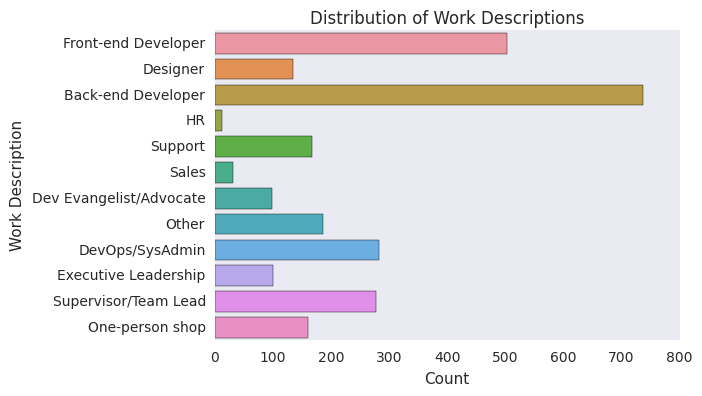

In [41]:
#then build count frame
workLevCountFrame = pd.DataFrame({"Work Description":workLevels,
                                  "Count":workLevCountVec})
#then plot
sns.barplot(x = "Count",y = "Work Description",data = workLevCountFrame)
plt.xlabel("Count")
plt.title("Distribution of Work Descriptions")
plt.savefig("../reports/blogPost/blogPostFigures/figure6.png",
            bbox_inches = "tight")

_Figure 11: Counts of Work Descriptions._

We see that around half of the individuals in this survey identify themselves as back-end developers. a sizable number of individuals also identify as front-end developers. We see also a sizable number of individuals in managerial and non-technical roles. It would be interesting to indentify whether there is a difference in the mental health among individuals in technical roles and individuals in non-technical roles.

Let's study the distribution of those in technical roles, those in non-technical roles, and those in both.

In [ ]:
#make encoding
#get back to this

### Company Information

Let us study some company-level questions available in this initial dataset. In particular, let us study how many individuals are in fact self-employed.

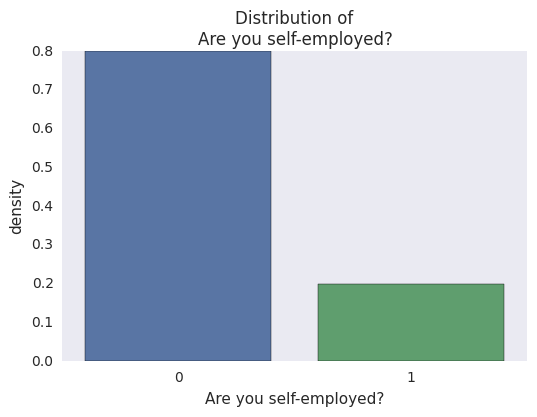

In [139]:
buildBarplot("Are you self-employed?",responseFrame)

_Figure 12: Distribution of responses by whether the responder is self-employed._

We see that around $20\%$ of responders claim to be self-employed. This is a sizable amount, and this may suggest that this is a meaningful variable to consider.

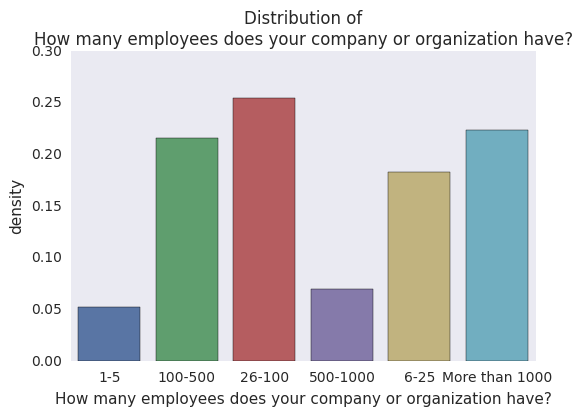

In [142]:
buildBarplot("How many employees does your company or organization have?",
             responseFrame)

_Figure 13: Distribution of the response "How many employees does your company or organization have?"_

We see that most companies discussed in this dataset are generall small or mid-sized operations, with only a moderate fraction of companies having more than $1000$ workers. It will be interesting to study the size of the companies and their relationship with what mental health resources are provided by said companies.

<a id="bivariateAnalysis" />

## Bivariate Analysis

We should now look at the relationship among some of our target and feature variables.

### Crosstabs For Diagnoses

I was slightly interested in the cross-tabulation between the variables indicated diagnosis and diagnosis from a medical professional.

In [32]:
#get column names of relevant variables
haveHadMHDString = "Have you had a mental health disorder in the past?"
nowHaveMHDString = "Do you currently have a mental health disorder?"
haveBeenDiagnosedString = "Have you been diagnosed with a mental health condition by a medical professional?"
pd.crosstab(responseFrame[haveHadMHDString],responseFrame[nowHaveMHDString])

Do you currently have a mental health disorder?,Maybe,No,Yes
Have you had a mental health disorder in the past?,,,
Maybe,155,65,26
No,50,370,30
Yes,122,95,519


_Table 3: Cross-tabulation of whether someone had a mental health disorder in the past on whether someone claims to currently have a mental health disorder._

It is apparent that the diagonal of this matrix is heavily emphasized. This suggests that most persons mental health conditions have not changed between the past and the present. However, what does seem slightly interesting is the fact that if one was diagnosed with a mental health disorder in the past there is a
$$\frac{122}{122 + 95 + 519} \cdot 100 \%
\approx 16.58\%$$

chance that there are uncertain about whether they still have this mental health disorder currently. This would suggest that there may be a sizable number of people who have been treated, but are uncertain whether having been treated would imply that they currently have the mental health disorder.

In [33]:
pd.crosstab(responseFrame[nowHaveMHDString],
            responseFrame[haveBeenDiagnosedString])

Have you been diagnosed with a mental health condition by a medical professional?,No,Yes
Do you currently have a mental health disorder?,,
Maybe,203,124
No,449,81
Yes,64,511


_Table 4: Cross-tabulation relating those who currently have a mental health disorder with those who have been diagnosed with a mental health condition._

There are a couple of interpretation issues to address here.

### Demographic relationships with Diagnosis

We see some gender effects [in other analyses](https://github.com/JCardenasRdz/Data.World/blob/master/OSMI_Mental_Health_2016/2017-03-04_JCR_Gender_Effect.ipynb), but let us just confirm this predictive effect in our notebook.

In [34]:
#make encoding later

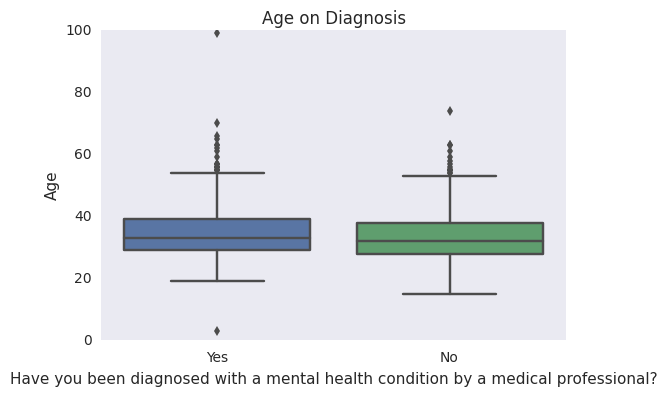

In [35]:
sns.boxplot(x = haveBeenDiagnosedString,
            y = "What is your age?",data = responseFrame)
plt.title("Age on Diagnosis")
plt.ylabel("Age")

_Figure 14: Age on diagnosis by a medical professional._

We see that there is very little predictive effect of age on diagnosis here.

In [40]:
responseFrame["inUSA"] = 0
responseFrame.loc[responseFrame["What country do you work in?"] ==
                        "United States of America","inUSA"] = 1
givenTab = pd.crosstab(responseFrame["inUSA"],
                        responseFrame[haveBeenDiagnosedString],
                        normalize = "index")
givenTab.columns.name = "Diagnosed?"
display(givenTab)

Diagnosed?,No,Yes
inUSA,,
0,0.587629,0.412371
1,0.440000,0.560000


In [165]:
usaFrame = responseFrame[responseFrame["inUSA"] == 1]
#make state variable
stateString = "What US state or territory do you work in?"
usaFrame["westCoast"] = 0
westCoastSet = set(["California","Washington","Oregon"])
usaFrame.loc[usaFrame[stateString].isin(westCoastSet),
             "westCoast"] = 1
pd.crosstab(usaFrame["westCoast"],usaFrame[haveBeenDiagnosedString],
            normalize = "index")

Have you been diagnosed with a mental health condition by a medical professional?,No,Yes
westCoast,,
0,0.452681,0.547319
1,0.402778,0.597222


In [166]:
finTechSet = set(["New York","Illinois"])
usaFrame["finTechArea"] = 0
usaFrame.loc[usaFrame[stateString].isin(finTechSet),"finTechArea"] = 1
pd.crosstab(usaFrame["finTechArea"],usaFrame[haveBeenDiagnosedString],
            normalize = "index")

Have you been diagnosed with a mental health condition by a medical professional?,No,Yes
finTechArea,,
0,0.442799,0.557201
1,0.420561,0.579439


In [167]:
stateFrame = pd.crosstab(usaFrame[stateString],
                         usaFrame[haveBeenDiagnosedString])
#get total
stateFrame["total"] = stateFrame["No"] + stateFrame["Yes"]
stateFrame = stateFrame.sort_values("total",ascending = False)
#then get prop yes and prop no
stateFrame["propYes"] = (stateFrame["Yes"] /
                            (stateFrame["Yes"] + stateFrame["No"]))
stateFrame["propNo"] = 1 - stateFrame["propYes"]
#then make a displayable frame
displayFrame = stateFrame.loc[:,["propNo","propYes","total"]]
display(displayFrame)

Have you been diagnosed with a mental health condition by a medical professional?,propNo,propYes,total
What US state or territory do you work in?,,,
California,0.390071,0.609929,141
Illinois,0.431034,0.568966,58
New York,0.408163,0.591837,49
Michigan,0.553191,0.446809,47
Texas,0.363636,0.636364,44
Minnesota,0.534884,0.465116,43
Washington,0.380952,0.619048,42
Oregon,0.484848,0.515152,33
Pennsylvania,0.281250,0.718750,32


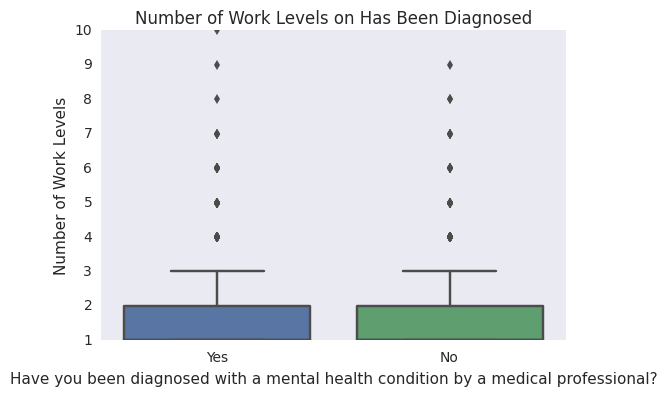

In [170]:
#study type of work
sns.boxplot(x = haveBeenDiagnosedString,y = "numWorkLevs",
            data = responseFrame)
plt.title("Number of Work Levels on Has Been Diagnosed")
plt.ylabel("Number of Work Levels")

_Figure 15: Distribution of the number of work levels on whether a given respondent has been diagnosed with a mental health condition._

It is apparent that the right-skew of the worke level distribution does not seem to be altered between whether a respondent has been diagnosed or not.

In [172]:
#make role dictionary
roleDict = {"technical":["Front-end Developer","Back-end Developer",
                         "DevOps/SysAdmin","Designer"],
            "non-technical":["HR","Support","Sales","Dev Evangelist/Advocate",
                             "Other","Excecutive Leadership",
                             "Supervisor/Team Lead","One-person shop"]}
def findRoleType(workString):
    #helper that finds the role type of an individual based on the string of
    #job descriptions provided
    for technicalRole in roleDict["technical"]:
        #search to find it in job descriptions
        if (technicalRole in workString):
            #now see if they take on an additional non-technical role
            for nonTechnicalRole in roleDict["non-technical"]:
                if (nonTechnicalRole in workString): #they do both
                    return "both"
            #if we got to this point, they are just technical
            return "technical"
    #if we got here, they are non-technical
    return "non-technical"
#apply this across job types
responseFrame["roleType"] = responseFrame[
    "Which of the following best describes your work position?"].apply(
    findRoleType)

In [174]:
#then crosstab with diagnosis
pd.crosstab(responseFrame["roleType"],responseFrame[haveBeenDiagnosedString],
            normalize = "index")

Have you been diagnosed with a mental health condition by a medical professional?,No,Yes
roleType,,
both,0.506667,0.493333
non-technical,0.480519,0.519481
technical,0.507440,0.492560


_Table X: Distribution of diagnosis given role type stated._

It is apparent that there doesn't look to be a significant difference in the diagnosis rate given the role type of an individual. This has very interesting implications: It is possible that the stress culture of non-technical positions is as severe as the stress culture present in technical teams. That being said, this current role type encoding may need some robustness checks. I have placed "Designer" as a technical role, but it is unclear whether this was the appropriate decision. I also placed "Other" options in non-technical, which may be a spurious statement since there could be "Other" technical roles that people are indicating. This may need to be altered if we want to make stronger statements about this null correlation.

### Company Relationships with Diagnosis

In [181]:
pd.crosstab(responseFrame["Are you self-employed?"],
            responseFrame[haveBeenDiagnosedString],
            normalize = "index")

Have you been diagnosed with a mental health condition by a medical professional?,No,Yes
Are you self-employed?,,
0,0.504803,0.495197
1,0.480836,0.519164


_Table X: Distribution of diagnosis given whether an individual is self-employed._

We see that there is generally little difference in the distribution of diagnosis given the self-employed variable. Given the very few direct correlations found in the demographic relationships with diagnosis, I am beginning to be slightly concerned that we see very few relationships existing within this dataset.

In [184]:
pd.crosstab(
    responseFrame["How many employees does your company or organization have?"],
    responseFrame[haveBeenDiagnosedString],normalize = "index")

Have you been diagnosed with a mental health condition by a medical professional?,No,Yes
How many employees does your company or organization have?,,
1-5,0.550000,0.450000
100-500,0.493927,0.506073
26-100,0.506849,0.493151
500-1000,0.550000,0.450000
6-25,0.552381,0.447619
More than 1000,0.449219,0.550781


_Table X: Distribution of diagnosis given the user-inputted company size._

Yet again, we see minimal predictive effect of company size on diagnosis.

# Discussion

There are a couple of details we should note so far:

* Very few of the variables discussed in [Hypotheses & Questions](https://data.world/kittybot/osmi-mental-health-tech-2016/discuss/hypotheses-questions/7676) seem to be having an affect on diagnosis.

* We have some initial analysis that points to the possibility of a gender effect.

* We have one suggestion that being in the united states seems to have a weak but present direct effect.

There are a couple options to consider here:

* Perhaps what we shouldn't be looking at is whether someone was diagnosed by a medical professional, but rather whether someone feels they currently have a mental health disorder. I primarily chose the former because I felt it would be a better measure of the mental health landscape as viewed in the lense of a psychiatrist. But perhaps the data is to noisy to pick up on meaningful covariates predicting these diagnoses by medical professionals.

* It is possible that we have few direct effects, but we may have some meaningful interaction effects among some of these variables for predicting a diagnosis. In this sense, it may be useful to initially model this question using a decision tree in order to visualize possible interaction effects before going for an explicit generalized linear model.